# Лабораторная работа №3
## ВЫДЕЛЕНИЕ ТРЕНДОВОЙ СОСТАВЛЯЮЩЕЙ ВРЕМЕННОГО РЯДА
### Комлева Юлия Владимировна
### Вариант: 9
### Группа: РИМ-181226

In [1]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from statsmodels.tsa import api as tsa 
from sklearn.linear_model import LinearRegression
import time
import statsmodels.api as sm
from scipy.optimize import curve_fit
import pandas as pd
%matplotlib inline

In [2]:
Y = np.array([12.19, 8.41, 14.68, 8.64, 32.94, 22.61, 45.92, 23.63, 18.59, 36.22, 50.10, 46.22, 23.63, 47.30, 40.03, 56.53, 38.41, 51.47, 6.29, 35.41, 67.79, 74.21, 79.12, 45.10])
t = np.linspace(0, 1, num = 24)

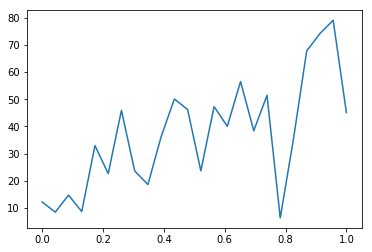

In [3]:
plt.plot(t, Y)
plt.show()

In [4]:
def func(t, b):
    return b[0] + b[1]*t 

def func2(t, b): 
    return b[0] + b[1]*t + b[2]*t*t 

def func3(t, b): 
    return b[0] + b[1]*t + b[2]*t*t +b[3]*t*t*t

def funcexp(t, b): 
    return np.exp(b[0] + b[1]*t)

def add_mse(B, f, X, Y):
    y_pred = f(X, B)
    B = np.append(B, mean_squared_error(Y, y_pred))
    return B

def add_time(B, t1, t2):
    B = np.append(B, t2-t1)
    return B

# Curve fitting
## 1. first degree polynomial trend
Рассчитать регрессионную модель тренда первого порядка, то есть линейный тренд 


$$\tau (t) = \beta_{0}+\beta_{1}t $$ 

\begin{equation*}
\begin{vmatrix}
y_{1} \\
y_{2} \\
. \\
y_{N} \\
\end{vmatrix}=
\begin{vmatrix}
1 & t_{1} \\
1 & t_{2} \\
. & . \\
1 & t_{N} 
\end{vmatrix}
\begin{vmatrix}
\beta_{0} \\
\beta_{1} 
\end{vmatrix}
\end{equation*}

In [5]:
X = list(zip(np.ones(24), t))

### 1.1 numpy.linalg.lstsq

In [6]:
t1=time.time()
B_lin_lstsq = np.linalg.lstsq(X,Y, rcond=None)
t2=time.time()
B_lin_lstsq = B_lin_lstsq[0]
B_lin_lstsq = add_mse(B_lin_lstsq, func, t, Y)
B_lin_lstsq = add_time(B_lin_lstsq, t1, t2)

### 1.2 np.polyfit

In [7]:
t1=time.time()
B = np.polyfit(t, Y, 1) # полиномиальная кривая 1-го порядка
t2=time.time()
B_lin_polyfit = []
B_lin_polyfit.append(B[1])
B_lin_polyfit.append(B[0])
B_lin_polyfit = add_mse(B_lin_polyfit, func, t, Y)
B_lin_polyfit = add_time(B_lin_polyfit, t1, t2)

#### 1.2.1 numpy.polyfit + numpy.poly1d 

In [8]:
p = np.poly1d(B) # создаем экземпляр полинома

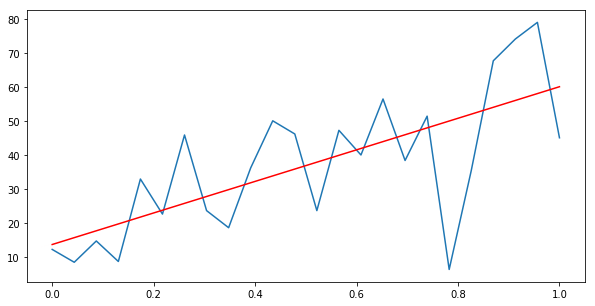

In [9]:
# считаем значения полинома на заданной временной сетке
plt.figure(figsize = (10, 5))
plt.plot(t, Y)
plt.plot(t, p(t), 'r')
plt.show()

### 1.3 scipy.stats.linregress

In [10]:
t1=time.time()
B = stats.linregress(t, Y)
t2=time.time()
B_lin_linregress = []
B_lin_linregress.append(B.intercept)
B_lin_linregress.append(B.slope)
B_lin_linregress = add_mse(B_lin_linregress, func, t, Y)
B_lin_linregress = add_time(B_lin_linregress, t1, t2)

In [11]:
B

LinregressResult(slope=46.510600000000004, intercept=13.638033333333329, rvalue=0.6920911440221024, pvalue=0.0001790491240382672, stderr=10.341898614535598)

### 1.4 scipy.optimize.curve_fit

In [12]:
def f(t, b0, b1): # описываем функцию тренда
    return b0 + b1 * t # линейный тренд с 2 параметрами

t1=time.time()
B_lin_curve_fit, pcov = curve_fit(f, t, Y) # проводим подгонку МНК
t2=time.time()
B_lin_curve_fit = add_mse(B_lin_curve_fit, func, t, Y)
B_lin_curve_fit = add_time(B_lin_curve_fit, t1, t2)

In [13]:
print(pcov) # ковариационная матрица ошибок подгонки 

[[ 36.42665739 -53.47743305]
 [-53.47743305 106.95486594]]


### 1.5 sklearn.linear_model.LinearRegression

In [14]:
t1=time.time()
reg = LinearRegression().fit(t.reshape(-1,1), Y)
t2=time.time()
B_lin_LinearRegression = []
B_lin_LinearRegression.append(reg.intercept_)
B_lin_LinearRegression.append(reg.coef_[0])
B_lin_LinearRegression = add_mse(B_lin_LinearRegression, func, t, Y)
B_lin_LinearRegression = add_time(B_lin_LinearRegression, t1, t2)

In [15]:
print(reg.score(t.reshape(-1,1), Y))
# здесь будет выведена «оценка» (равная R^2) полученной регрессии, чем ближе она к 1.0, тем лучше тренд

0.47899015163382236


### 1.6 statsmodels

In [16]:
t1=time.time()
x_ = sm.add_constant(t.reshape(-1,1)) # создаем простую модель
smm = sm.OLS(Y, x_) # используем Метод Наименьших Квадратов
# (МНК) (Ordinary Least Squares = OLS)
res = smm.fit() # подгоняем параметры модели по МНК
t2=time.time()
B_lin_statsmodel = res.params
B_lin_statsmodel = add_mse(B_lin_statsmodel, func, t, Y)
B_lin_statsmodel = add_time(B_lin_statsmodel, t1, t2)

In [17]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     20.23
Date:                Sun, 24 Mar 2019   Prob (F-statistic):           0.000179
Time:                        00:07:01   Log-Likelihood:                -98.398
No. Observations:                  24   AIC:                             200.8
Df Residuals:                      22   BIC:                             203.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6380      6.035      2.260      0.0

### 1.7 Analytic solution 
#### Нормальное уравнение
### 1.7.1 using Moore-Penrose pseudoinverse
$$\Large y = Xw$$
Домножаем слева на $X^T$
$$\Large X^Ty = X^TXw$$
Так как матрица $X^TX$ - квадратная, то можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - __псевдообратная__ для матрицы $X$. 

`pinv`

### 1.7.2 np.linalg.solve
$$\Large X^TXw = X^Ty$$

In [18]:
def normal_equation1(X, y):
    return np.dot(np.linalg.pinv(X), y)

def normal_equation2(X, y):
    X = np.array(X)
    y = np.array(y)
    return np.linalg.solve(X.T.dot(X), X.T.dot(y))

In [19]:
t1=time.time()
B_lin_normeq1 = normal_equation1(X, Y)
t2=time.time()
B_lin_normeq1 = add_mse(B_lin_normeq1, func, t, Y)
B_lin_normeq1 = add_time(B_lin_normeq1, t1, t2)

In [20]:
t1=time.time()
B_lin_normeq2 = normal_equation2(X, Y)
t2=time.time()
B_lin_normeq2 = add_mse(B_lin_normeq2, func, t, Y)
B_lin_normeq2 = add_time(B_lin_normeq2, t1, t2)

### 1.8 linear regression +  stochastic_gradient_descent

_Линейная регрессия (функционал качества - среднеквадратичная ошибка)_:
$$ \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1}) - y_i)}^2} \rightarrow \min_{w_0, w_1},$$

$x_{i1}, x_{i2}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

_Стохастический градиентный спуск (без градиента по всем данным):_
$$ \beta_0 \leftarrow \beta_0 - \frac{2\eta}{\ell} {((\beta_0 + \beta_1t_{k1}) - y_k)}$$
$$\beta_1 \leftarrow \beta_1 - \frac{2\eta}{\ell} {t_{k1}((\beta_0 + \beta_1t_{k1} ) - y_k)}$$

$k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$

$\eta$ - параметр, шаг градиентного спуска

*stochastic_gradient_step* - шаг стохастического градиентного спуска для линейной регрессии. 

- train_ind - индекс объекта обучающей выборки (строки матрицы *X*)
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)

In [21]:
n = 24

In [22]:
def stochastic_gradient_step(X, y, beta, train_ind, eta = 0.01):
    
    x0 = X[train_ind][0] 
    x1 = X[train_ind][1] 
    
    yi = y[train_ind] 
    
    grad0 = x0 * ((beta[0] + beta[1]*x1 ) - yi) 
    grad1 = x1 * ((beta[0] + beta[1]*x1 ) - yi) 
    
    beta = beta - (2*eta/n) * np.array([grad0, grad1])
    
    return  beta

In [23]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Счетчик итераций
    iter_num = 0
    np.random.seed(seed)

    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        w_previous = w #вектор весов с предыдущей итерации
        
        w = stochastic_gradient_step(X, y, w_previous, random_ind, eta) #новый вектор весов
        weight_dist = np.linalg.norm(w - w_previous) #расстояние между векторами весов
        iter_num += 1
        
    return w

In [24]:
X = np.array(X)
Y = np.array(Y)

t1=time.time()
B_lin_stochgraddesc = stochastic_gradient_descent(X, Y, w_init=np.zeros(2), eta=1e-2, max_iter=1e5) 
t2=time.time()
B_lin_stochgraddesc = add_mse(B_lin_stochgraddesc, func, t, Y)
B_lin_stochgraddesc = add_time(B_lin_stochgraddesc, t1, t2)

Удостоверьтесь, что во всех реализациях получились одинаковые
коэффициенты линейного тренда.

In [25]:
def print1():
    print("lin--------------------------------------------------------")
    print("                       [b0     b1     MSE     time ]")
    print("1 lstsq            ->  " + np.array2string(B_lin_lstsq, formatter={'float_kind':'{0:.3f}'.format}))
    print("2 polyfit          ->  " + np.array2string(B_lin_polyfit, formatter={'float_kind':'{0:.3f}'.format}))
    print("3 linregress       ->  " + np.array2string(B_lin_linregress, formatter={'float_kind':'{0:.3f}'.format}))
    print("4 curve_fit        ->  " + np.array2string(B_lin_curve_fit, formatter={'float_kind':'{0:.3f}'.format}))
    print("5 LinearRegression ->  " + np.array2string(B_lin_LinearRegression, formatter={'float_kind':'{0:.3f}'.format}))
    print("6 statsmodel       ->  " + np.array2string(B_lin_statsmodel, formatter={'float_kind':'{0:.3f}'.format}))
    print("7 pinv             ->  " + np.array2string(B_lin_normeq1, formatter={'float_kind':'{0:.3f}'.format}))
    print("8 solve            ->  " + np.array2string(B_lin_normeq2, formatter={'float_kind':'{0:.3f}'.format}))
    print("9 stochgraddescent ->  " + np.array2string(B_lin_stochgraddesc, formatter={'float_kind':'{0:.3f}'.format}))

In [26]:
print1()

lin--------------------------------------------------------
                       [b0     b1     MSE     time ]
1 lstsq            ->  [13.638 46.511 213.135 0.004]
2 polyfit          ->  [13.638 46.511 213.135 0.000]
3 linregress       ->  [13.638 46.511 213.135 0.001]
4 curve_fit        ->  [13.638 46.511 213.135 0.001]
5 LinearRegression ->  [13.638 46.511 213.135 0.000]
6 statsmodel       ->  [13.638 46.511 213.135 0.001]
7 pinv             ->  [13.638 46.511 213.135 0.000]
8 solve            ->  [13.638 46.511 213.135 0.000]
9 stochgraddescent ->  [13.626 46.025 213.221 1.373]


## 2. second degree polynomial trend
$$\tau (t) = \beta_{0}+\beta_{1}t +\beta_{2}t^2$$ 

\begin{equation*}
\begin{vmatrix}
y_{1} \\
y_{2} \\
. \\
y_{N} \\
\end{vmatrix}=
\begin{vmatrix}
1 & t_{1} & t_{1}^{2}\\
1 & t_{2} & t_{2}^{2}\\
. & . & .\\
1 & t_{N} & t_{N}^{2}\\
\end{vmatrix}
\begin{vmatrix}
\beta_{0} \\
\beta_{1} \\
\beta_{2}
\end{vmatrix}
\end{equation*}



In [27]:
XX = list(zip(np.ones(24), t, t*t))

### 2.1 numpy.linalg.lstsq 

In [28]:
t1=time.time()
BB = np.linalg.lstsq(XX,Y, rcond=None)
t2=time.time()
BB = BB[0]
B_quad_lstsq = []
B_quad_lstsq.append(BB[0])
B_quad_lstsq.append(BB[1])
B_quad_lstsq.append(BB[2])
B_quad_lstsq = add_mse(B_quad_lstsq, func2, t, Y)
B_quad_lstsq = add_time(B_quad_lstsq, t1, t2)

### 2.2 np.polyfit

In [29]:
t1=time.time()
BB = np.polyfit(t, Y, 2)
t2=time.time()
B_quad_polyfit = []
B_quad_polyfit.append(BB[2])
B_quad_polyfit.append(BB[1])
B_quad_polyfit.append(BB[0])
B_quad_polyfit = add_mse(B_quad_polyfit, func2, t, Y)
B_quad_polyfit = add_time(B_quad_polyfit, t1, t2)

### 2.3 scipy.optimize.curve_fit

In [30]:
def f2(t, b0, b1, b2): # описываем функцию тренда
    return b0 + b1 * t + b2 * t* t
t1=time.time()
B_quad_curve_fit, pcov = curve_fit(f2, t, Y) # проводим подгонку МНК
t2=time.time()
B_quad_curve_fit = add_mse(B_quad_curve_fit, func2, t, Y)
B_quad_curve_fit = add_time(B_quad_curve_fit, t1, t2)

In [31]:
#print(pcov) # ковариационная матрица ошибок подгонки 

### 2.4 sklearn.linear_model.LinearRegression

In [32]:
t1=time.time()
reg = LinearRegression().fit(XX, Y)
t2=time.time()
B_quad_LinearRegression = []
B_quad_LinearRegression.append(reg.intercept_)
B_quad_LinearRegression.append(reg.coef_[1])
B_quad_LinearRegression.append(reg.coef_[2])
B_quad_LinearRegression = add_mse(B_quad_LinearRegression, func2, t, Y)
B_quad_LinearRegression = add_time(B_quad_LinearRegression, t1, t2)

### 2.5 statsmodels

In [33]:
t1=time.time()
x_ = sm.add_constant(XX) # создаем простую модель
smm = sm.OLS(Y, x_) # используем Метод Наименьших Квадратов
res = smm.fit() # подгоняем параметры модели по МНК
t2=time.time()
B_quad_statsmodel = res.params
B_quad_statsmodel = add_mse(B_quad_statsmodel, func2, t, Y)
B_quad_statsmodel = add_time(B_quad_statsmodel, t1, t2)

In [34]:
#print(res.summary())

In [35]:
def print2():
    print("quad-------------------------------------------------------")
    print("                       [b0     b1     b2     MSE     time ]")
    print("1 lstsq            ->  " + np.array2string(B_quad_lstsq, formatter={'float_kind':'{0:.3f}'.format}))
    print("2 polyfit          ->  " + np.array2string(B_quad_polyfit, formatter={'float_kind':'{0:.3f}'.format}))
    print("3 curve_fit        ->  " + np.array2string(B_quad_curve_fit, formatter={'float_kind':'{0:.3f}'.format}))
    print("4 LinearRegression ->  " + np.array2string(B_quad_LinearRegression, formatter={'float_kind':'{0:.3f}'.format}))
    print("5 statsmodel       ->  " + np.array2string(B_quad_statsmodel, formatter={'float_kind':'{0:.3f}'.format}))

In [36]:
print2()

quad-------------------------------------------------------
                       [b0     b1     b2     MSE     time ]
1 lstsq            ->  [12.187 55.614 -9.104 212.594 0.000]
2 polyfit          ->  [12.187 55.614 -9.104 212.594 0.001]
3 curve_fit        ->  [12.187 55.614 -9.104 212.594 0.001]
4 LinearRegression ->  [12.187 55.614 -9.104 212.594 0.001]
5 statsmodel       ->  [12.187 55.614 -9.104 212.594 0.001]


## 3. third degree polynomial trend
$$\tau (t) = \beta_{0}+\beta_{1}t +\beta_{2}t^2 +\beta_{3}t^3$$ 

\begin{equation*}
\begin{vmatrix}
y_{1} \\
y_{2} \\
. \\
y_{N} \\
\end{vmatrix}=
\begin{vmatrix}
1 & t_{1} & t_{1}^{2} & t_{1}^{3}\\
1 & t_{2} & t_{2}^{2} & t_{2}^{3}\\
. & . & .\\
1 & t_{N} & t_{N}^{2} & t_{N}^{3}\\
\end{vmatrix}
\begin{vmatrix}
\beta_{0} \\
\beta_{1} \\
\beta_{2} \\
\beta_{3}
\end{vmatrix}
\end{equation*}

In [37]:
XXX = list(zip(np.ones(24), t, t*t, t*t*t))

### 3.1 numpy.linalg.lstsq 

In [38]:
t1=time.time()
BB = np.linalg.lstsq(XXX,Y, rcond=None)
t2=time.time()
BB = BB[0]
B_cubic_lstsq = []
B_cubic_lstsq.append(BB[0])
B_cubic_lstsq.append(BB[1])
B_cubic_lstsq.append(BB[2])
B_cubic_lstsq.append(BB[3])
B_cubic_lstsq = add_mse(B_cubic_lstsq, func3, t, Y)
B_cubic_lstsq = add_time(B_cubic_lstsq, t1, t2)

### 3.2 np.polyfit

In [39]:
t1=time.time()
BB = np.polyfit(t, Y, 3)
t2=time.time()
B_cubic_polyfit = []
B_cubic_polyfit.append(BB[3])
B_cubic_polyfit.append(BB[2])
B_cubic_polyfit.append(BB[1])
B_cubic_polyfit.append(BB[0])
B_cubic_polyfit = add_mse(B_cubic_polyfit, func3, t, Y)
B_cubic_polyfit = add_time(B_cubic_polyfit, t1, t2)

### 3.3 scipy.optimize.curve_fit

In [40]:
def f3(t, b0, b1, b2, b3): # описываем функцию тренда
    return b0 + b1 * t + b2 * t* t + b3 * t * t * t
t1=time.time()
B_cubic_curve_fit, pcov = curve_fit(f3, t, Y) # проводим подгонку МНК
t2=time.time()
B_cubic_curve_fit = add_mse(B_cubic_curve_fit, func3, t, Y)
B_cubic_curve_fit = add_time(B_cubic_curve_fit, t1, t2)

In [41]:
#print(pcov) # ковариационная матрица ошибок подгонки 

### 3.4 sklearn.linear_model.LinearRegression

In [42]:
t1=time.time()
reg = LinearRegression().fit(XXX, Y)
t2=time.time()
B_cubic_LinearRegression = []
B_cubic_LinearRegression.append(reg.intercept_)
B_cubic_LinearRegression.append(reg.coef_[1])
B_cubic_LinearRegression.append(reg.coef_[2])
B_cubic_LinearRegression.append(reg.coef_[3])
B_cubic_LinearRegression = add_mse(B_cubic_LinearRegression, func3, t, Y)
B_cubic_LinearRegression = add_time(B_cubic_LinearRegression, t1, t2)

### 3.5 statsmodels

In [43]:
t1=time.time()
x_ = sm.add_constant(XXX) # создаем простую модель
smm = sm.OLS(Y, x_) # используем Метод Наименьших Квадратов
res = smm.fit() # подгоняем параметры модели по МНК
t2=time.time()
B_cubic_statsmodel = res.params
B_cubic_statsmodel = add_mse(B_cubic_statsmodel, func3, t, Y)
B_cubic_statsmodel = add_time(B_cubic_statsmodel, t1, t2)

In [44]:
#print(res.summary())

In [45]:
def print3():
    print("cubic------------------------------------------------------")
    print("                       [b0    b1       b2      b3      MSE     time ]")
    print("1 lstsq            ->  " + np.array2string(B_cubic_lstsq, formatter={'float_kind':'{0:.3f}'.format}))
    print("2 polyfit          ->  " + np.array2string(B_cubic_polyfit, formatter={'float_kind':'{0:.3f}'.format}))
    print("3 curve_fit        ->  " + np.array2string(B_cubic_curve_fit, formatter={'float_kind':'{0:.3f}'.format}))
    print("4 LinearRegression ->  " + np.array2string(B_cubic_LinearRegression, formatter={'float_kind':'{0:.3f}'.format}))
    print("5 statsmodel       ->  " + np.array2string(B_cubic_statsmodel, formatter={'float_kind':'{0:.3f}'.format}))

In [46]:
print3()

cubic------------------------------------------------------
                       [b0    b1       b2      b3      MSE     time ]
1 lstsq            ->  [5.650 143.530 -233.632 149.686 202.513 0.001]
2 polyfit          ->  [5.650 143.530 -233.632 149.686 202.513 0.001]
3 curve_fit        ->  [5.650 143.530 -233.632 149.686 202.513 0.001]
4 LinearRegression ->  [5.650 143.530 -233.632 149.686 202.513 0.000]
5 statsmodel       ->  [5.650 143.530 -233.632 149.686 202.513 0.001]


## 4. exponential trend
$$\tau (t) = e^{\beta_{0} +\beta_{1}t}$$ 
$$ln(\tau (t)) = \beta_{0} +\beta_{1} t$$ 

\begin{equation*}
\begin{vmatrix}
ln(y_{1}) \\
ln(y_{2}) \\
. \\
ln(y_{N}) \\
\end{vmatrix}=
\begin{vmatrix}
 1 & t_{1}\\
 1 & t_{2}\\
 . & .\\
 1 & t_{N}
\end{vmatrix}
\begin{vmatrix}
\beta_{0} \\
\beta_{1} 
\end{vmatrix}
\end{equation*}

### 4.1 numpy.linalg.lstsq 

In [47]:
YY = np.log(Y)
X = list(zip(np.ones(24), t))
t1=time.time()
BE = np.linalg.lstsq(X,YY, rcond=None)
t2=time.time()
BE = BE[0]
B_exp_lstsq = []
B_exp_lstsq.append(BE[0])
B_exp_lstsq.append(BE[1])
B_exp_lstsq = add_mse(B_exp_lstsq, funcexp, t, Y)
B_exp_lstsq = add_time(B_exp_lstsq, t1, t2)

### 4.2 np.polyfit

In [48]:
t1=time.time()
BE = np.polyfit(t, YY, 1, w=np.sqrt(Y))
t2=time.time()
B_exp_polyfit = []
B_exp_polyfit.append(BE[1])
B_exp_polyfit.append(BE[0])
B_exp_polyfit = add_mse(B_exp_polyfit, funcexp, t, Y)
B_exp_polyfit = add_time(B_exp_polyfit, t1, t2)

### 4.3 scipy.optimize.curve_fit

In [49]:
def fexp(t, b0, b1): # описываем функцию тренда
    return  np.exp(b0+b1 * t)
t1=time.time()
B_exp_curve_fit, pcov = curve_fit(fexp, t, Y) # проводим подгонку МНК
t2=time.time()
B_exp_curve_fit = add_mse(B_exp_curve_fit, funcexp, t, Y)
B_exp_curve_fit = add_time(B_exp_curve_fit, t1, t2)

In [50]:
#pcov

### 4.4 sklearn.linear_model.LinearRegression

In [51]:
t1=time.time()
reg = LinearRegression().fit(X, YY)
t2=time.time()
B_exp_LinearRegression = []
B_exp_LinearRegression.append(reg.intercept_)
B_exp_LinearRegression.append(reg.coef_[1])
B_exp_LinearRegression = add_mse(B_exp_LinearRegression, funcexp, t, Y)
B_exp_LinearRegression = add_time(B_exp_LinearRegression, t1, t2)

### 4.5 statsmodels

In [52]:
t1=time.time()
x_ = sm.add_constant(X) # создаем простую модель
smm = sm.OLS(YY, x_) # используем Метод Наименьших Квадратов
# (МНК) (Ordinary Least Squares = OLS)
res = smm.fit() # подгоняем параметры модели по МНК
t2=time.time()
B_exp_statsmodel = res.params
#B_exp_statsmodel[0] = np.exp(B_exp_statsmodel[0])
B_exp_statsmodel = add_mse(B_exp_statsmodel, funcexp, t, Y)
B_exp_statsmodel = add_time(B_exp_statsmodel, t1, t2)

In [53]:
#print(res.summary())

In [54]:
t1=time.time()
B_exp_stochgraddesc = stochastic_gradient_descent(np.array(X), YY, w_init=np.zeros(2), eta=1e-2, max_iter=1e5)
t2=time.time()
#B_exp_stochgraddesc[0] = np.exp(B_exp_stochgraddesc[0])
B_exp_stochgraddesc = add_mse(B_exp_stochgraddesc, funcexp, t, Y)
B_exp_stochgraddesc = add_time(B_exp_stochgraddesc, t1, t2)

In [55]:
def printe():
    print("exp--------------------------------------------------------")
    print("                       [b0     b1     MSE     time ]")
    print("1 lstsq            ->  " + np.array2string(B_exp_lstsq, formatter={'float_kind':'{0:.3f}'.format}))
    print("2 polyfit          ->  " + np.array2string(B_exp_polyfit, formatter={'float_kind':'{0:.3f}'.format}))
    print("3 curve_fit        ->  " + np.array2string(B_exp_curve_fit, formatter={'float_kind':'{0:.3f}'.format}))
    print("4 LinearRegression ->  " + np.array2string(B_exp_LinearRegression, formatter={'float_kind':'{0:.3f}'.format}))
    print("5 statsmodel       ->  " + np.array2string(B_exp_statsmodel, formatter={'float_kind':'{0:.3f}'.format}))
    print("6 stochgraddescent ->  " + np.array2string(B_exp_stochgraddesc, formatter={'float_kind':'{0:.3f}'.format}))

In [56]:
printe()

exp--------------------------------------------------------
                       [b0     b1     MSE     time ]
1 lstsq            ->  [2.705 1.405 236.978 0.001]
2 polyfit          ->  [2.990 1.269 233.776 0.000]
3 curve_fit        ->  [2.937 1.217 220.064 0.000]
4 LinearRegression ->  [2.705 1.405 236.978 0.000]
5 statsmodel       ->  [2.705 1.405 236.978 0.001]
6 stochgraddescent ->  [2.702 1.391 240.123 1.401]


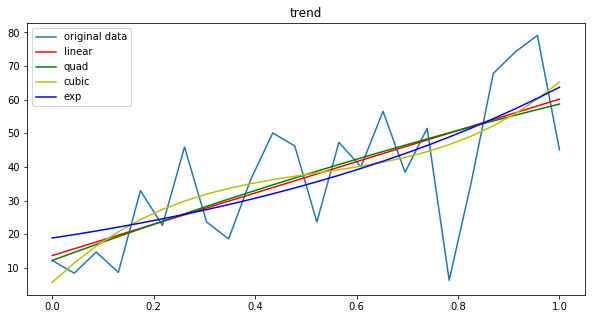

In [57]:
plt.figure(figsize = (10, 5))
plt.title("trend")
plt.plot(t, Y, label = 'original data') # строим исходный ВР 
plt.plot(t, func(t, B_lin_curve_fit) , 'r', label = 'linear')
plt.plot(t, func2(t, B_quad_curve_fit), 'g', label = 'quad')
plt.plot(t, func3(t, B_cubic_curve_fit), 'y', label = 'cubic')
plt.plot(t, funcexp(t, B_exp_curve_fit) , 'b', label = 'exp')
plt.legend()
plt.show()

In [58]:
print1()
print2()
print3()
printe()

lin--------------------------------------------------------
                       [b0     b1     MSE     time ]
1 lstsq            ->  [13.638 46.511 213.135 0.004]
2 polyfit          ->  [13.638 46.511 213.135 0.000]
3 linregress       ->  [13.638 46.511 213.135 0.001]
4 curve_fit        ->  [13.638 46.511 213.135 0.001]
5 LinearRegression ->  [13.638 46.511 213.135 0.000]
6 statsmodel       ->  [13.638 46.511 213.135 0.001]
7 pinv             ->  [13.638 46.511 213.135 0.000]
8 solve            ->  [13.638 46.511 213.135 0.000]
9 stochgraddescent ->  [13.626 46.025 213.221 1.373]
quad-------------------------------------------------------
                       [b0     b1     b2     MSE     time ]
1 lstsq            ->  [12.187 55.614 -9.104 212.594 0.000]
2 polyfit          ->  [12.187 55.614 -9.104 212.594 0.001]
3 curve_fit        ->  [12.187 55.614 -9.104 212.594 0.001]
4 LinearRegression ->  [12.187 55.614 -9.104 212.594 0.001]
5 statsmodel       ->  [12.187 55.614 -9.104 212.5

# 4 smooth
## 4.1 Оконное сглаживание

In [59]:
def smooth(x, window_len): 
    if window_len<3:
        return x
    s = np.r_[2*x[0]-x[window_len-1::-1], x, 2*x[-1]-x[-1:-window_len:-1]] 
    w=np.ones(window_len, 'd')
    y=np.convolve(w/w.sum(), s, mode='same')
    return y[window_len:-window_len+1]

#### Вторая реализация
$$\tau_{j} = 1/3(y_{j-1}+y_{j}+y_{j+1})$$
Расширение массива на размер половины окна с каждой стороны (дублируются первый и последний элементы)

In [60]:
def mysmooth(X, window_len):
    half_window=window_len//2
    X=np.concatenate([[X[0]]*half_window, X, [X[-1]]*half_window])
    smoothed=[]
    
    for i in range(half_window,len(X)-half_window):
        smoothed.append(X[i-half_window:i+1+half_window].sum()/window_len)
    
    return np.array(smoothed)

In [61]:
t1=time.time()
smoothed3 = smooth(Y, 3)
t2=time.time()
stats_smooth3 = np.array([mean_squared_error(smoothed3, Y), t2-t1])

t1=time.time()
smoothed7 = smooth(Y, 7)
t2=time.time()
stats_smooth7 = np.array([mean_squared_error(smoothed7, Y), t2-t1])

t1=time.time()
smoothed11 = smooth(Y, 11)
t2=time.time()
stats_smooth11 = np.array([mean_squared_error(smoothed11, Y), t2-t1])

t1=time.time()
mysmoothed3 = mysmooth(Y, 3)
t2=time.time()
stats_mysmooth3 = np.array([mean_squared_error(mysmoothed3, Y), t2-t1])

t1=time.time()
mysmoothed7 = mysmooth(Y, 7)
t2=time.time()
stats_mysmooth7 = np.array([mean_squared_error(mysmoothed7, Y), t2-t1])

t1=time.time()
mysmoothed11 = mysmooth(Y, 11)
t2=time.time()
stats_mysmooth11 = np.array([mean_squared_error(mysmoothed11, Y), t2-t1])

In [62]:
def prints():
    print("smooth--------------------------------------------------------")
    print("                 [MSE     time ]")
    print("1 smooth3    ->  " + np.array2string(stats_smooth3, formatter={'float_kind':'{0:.3f}'.format}))
    print("2 mysmooth3  ->  " + np.array2string(stats_mysmooth3, formatter={'float_kind':'{0:.3f}'.format}))
    print("3 smooth7    ->  " + np.array2string(stats_smooth7, formatter={'float_kind':'{0:.3f}'.format}))
    print("4 mysmooth7  ->  " + np.array2string(stats_mysmooth7, formatter={'float_kind':'{0:.3f}'.format}))
    print("5 smooth11   ->  " + np.array2string(stats_smooth11, formatter={'float_kind':'{0:.3f}'.format}))
    print("6 mysmooth11 ->  " + np.array2string(stats_mysmooth11, formatter={'float_kind':'{0:.3f}'.format}))

In [63]:
prints()

smooth--------------------------------------------------------
                 [MSE     time ]
1 smooth3    ->  [116.638 0.001]
2 mysmooth3  ->  [116.638 0.000]
3 smooth7    ->  [236.680 0.000]
4 mysmooth7  ->  [231.872 0.000]
5 smooth11   ->  [277.247 0.000]
6 mysmooth11 ->  [235.844 0.000]


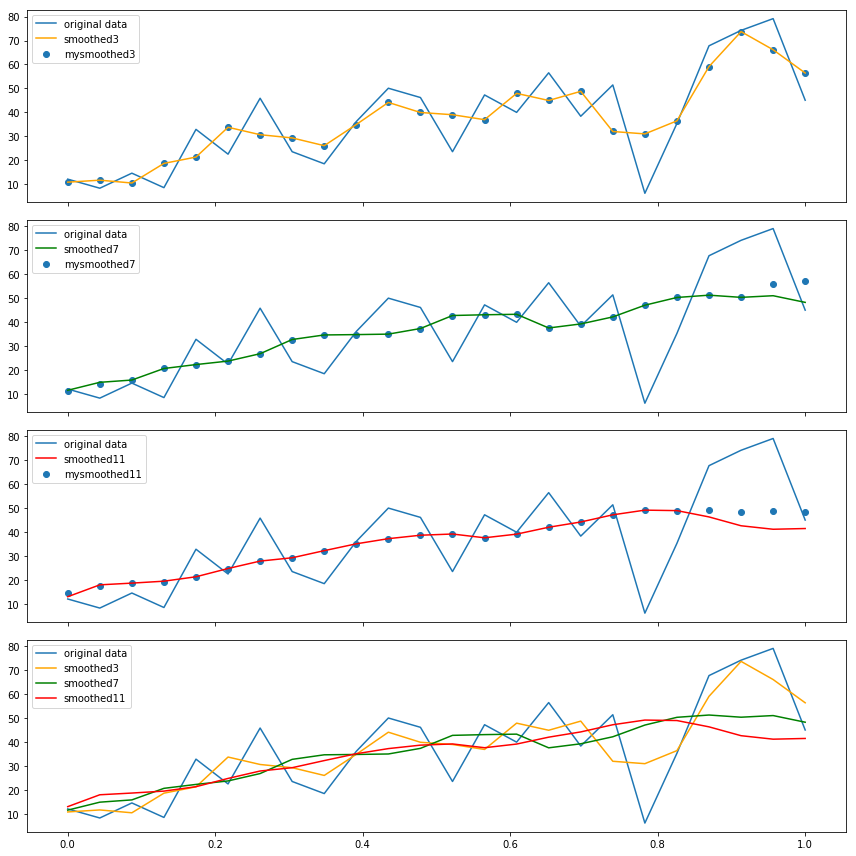

In [64]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(12, 12), sharex=True, sharey=True)

ax1.plot(t,Y, label = 'original data')
ax1.plot(t, smoothed3, label = 'smoothed3', color = 'orange')
ax1.scatter(t, mysmoothed3, label = 'mysmoothed3', marker='o')
ax1.legend()

ax2.plot(t,Y, label = 'original data')
ax2.plot(t, smoothed7, label = 'smoothed7', color = 'green')
ax2.scatter(t, mysmoothed7, label = 'mysmoothed7', marker='o')
ax2.legend()

ax3.plot(t,Y, label = 'original data')
ax3.plot(t, smoothed11, label = 'smoothed11', color = 'red')
ax3.scatter(t, mysmoothed11, label = 'mysmoothed11', marker='o')
ax3.legend()

ax4.plot(t,Y, label = 'original data')
ax4.plot(t, smoothed3, label = 'smoothed3', color = 'orange')
ax4.plot(t, smoothed7, label = 'smoothed7', color = 'green')
ax4.plot(t, smoothed11, label = 'smoothed11', color = 'red')
ax4.legend()
fig.tight_layout()

plt.show()

## 4.2 Экспоненциальное сглаживание
Для этого сглаживания используются уже все отсчеты исходного ВР, но с разными весовыми коэффициентами.
$$\tau_{j}=(1-\alpha)\tau_{j-1}+\alpha y_{j}$$
$j=1,2,...,N$

$\alpha$ - коэффициент экспоненциального сглаживания между 0 и 1, а в качестве первой точки берется среднее значение ВР (или первых двух точек).
Это сглаживание отличается тем, что веса убывают с удалением от точки начала сглаживания. Cтроится рекурсивно (следующее значение зависит от предыдущего), а потому может легко использоваться для прогнозирования тренда ВР.


In [65]:
def tau(t, j, a):
    if j >= 0:
        return (1 - a) * tau(t,j-1,a) + a * t[j]
    else:
        return (1 - a) * t[:2].mean() + a * t[j]

In [66]:
def e_smooth(t,a):
    w = []
    for i in range(len(t)):
        w.append(tau(t,i,a))
    return w

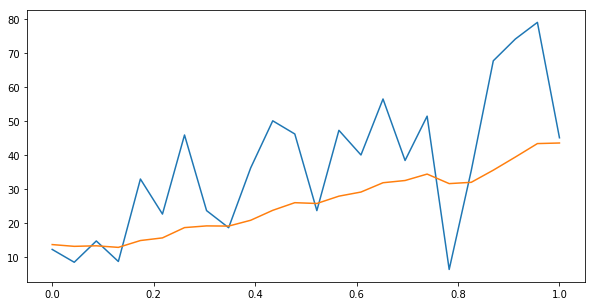

In [67]:
plt.figure(figsize = (10, 5))
plt.plot(t, Y)
plt.plot(t, e_smooth(Y,0.1))
plt.show()

In [68]:
alpha = np.linspace(0,1,1000)
errors = []
for i in range(len(alpha)):
    Y_pred = e_smooth(Y,alpha[i])
    errors.append(mean_squared_error(Y_pred, Y))

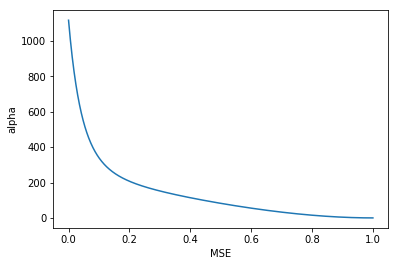

In [69]:
plt.plot(alpha, errors)
plt.xlabel('MSE')
plt.ylabel('alpha')
plt.show()

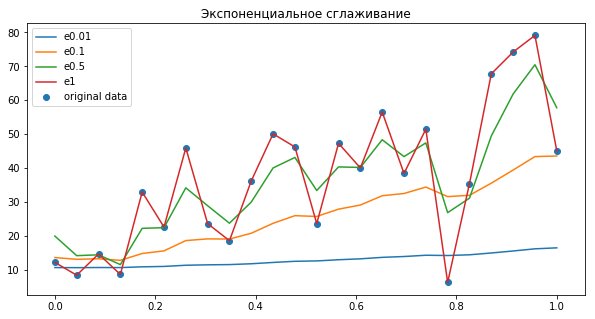

In [72]:
plt.figure(figsize = (10, 5))
plt.scatter(t, Y, label = 'original data')
plt.plot(t, e_smooth(Y,0.01), label = 'e0.01')
plt.plot(t, e_smooth(Y,0.1), label = 'e0.1')
plt.plot(t, e_smooth(Y,0.5), label = 'e0.5')
plt.plot(t, e_smooth(Y,1), label = 'e1')
plt.legend()
plt.title('Экспоненциальное сглаживание')
plt.show()